In [24]:
import gzip
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data = []
file_path = "renttherunway_final_data.json.gz"

with gzip.open(file_path, 'rt', encoding='utf-8') as f:
    for line in f:
        try:
            data.append(json.loads(line))
        except json.JSONDecodeError as e:
            print(f"Error decoding line: {e}")

df = pd.DataFrame(data)
df.head()

fit user_id bust size  item_id  weight rating     rented for  \
0  fit  420272       34d  2260466  137lbs     10       vacation   
1  fit  273551       34b   153475  132lbs     10          other   
2  fit  360448       NaN  1063761     NaN     10          party   
3  fit  909926       34c   126335  135lbs      8  formal affair   
4  fit  151944       34b   616682  145lbs     10        wedding   

                                         review_text          body type  \
0  An adorable romper! Belt and zipper were a lit...          hourglass   
1  I rented this dress for a photo shoot. The the...  straight & narrow   
2  This hugged in all the right places! It was a ...                NaN   
3  I rented this for my company's black tie award...               pear   
4  I have always been petite in my upper body and...           athletic   

                                      review_summary category height  size  \
0                               So many compliments!   romper  5' 8"    14   
1                            I felt so glamourous!!!     gown  5' 6"    12   
2  It was a great time to celebrate the (almost) ...   sheath  5' 4"     4   
3   Dress arrived on time and in perfect condition.     dress  5' 5"     8   
4                    Was in love with this dress !!!     gown  5' 9"    12   

   age         review_date  
0   28      April 20, 2016  
1   36       June 18, 2013  
2  116   December 14, 2015  
3   34   February 12, 2014  
4   27  September 26, 2016

In [25]:
df.isnull().sum().sum()

np.int64(64759)

## Data Cleaning

In [26]:
### Data Overview
overview = df.info()
overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   fit             192544 non-null  object
 1   user_id         192544 non-null  object
 2   bust size       174133 non-null  object
 3   item_id         192544 non-null  object
 4   weight          162562 non-null  object
 5   rating          192462 non-null  object
 6   rented for      192534 non-null  object
 7   review_text     192544 non-null  object
 8   body type       177907 non-null  object
 9   review_summary  192544 non-null  object
 10  category        192544 non-null  object
 11  height          191867 non-null  object
 12  size            192544 non-null  int64 
 13  age             191584 non-null  object
 14  review_date     192544 non-null  object
dtypes: int64(1), object(14)
memory usage: 22.0+ MB


In [27]:
### Descriptive Statistics
descriptive_stats = df.describe(include="all")
descriptive_stats

fit user_id bust size item_id  weight  rating rented for  \
count   192544  192544    174133  192544  162562  192462     192534   
unique       3  105571       106    5850     190       5          9   
top        fit  691468       34b  126335  130lbs      10    wedding   
freq    142058     436     27285    2241   14370  124537      57784   
mean       NaN     NaN       NaN     NaN     NaN     NaN        NaN   
std        NaN     NaN       NaN     NaN     NaN     NaN        NaN   
min        NaN     NaN       NaN     NaN     NaN     NaN        NaN   
25%        NaN     NaN       NaN     NaN     NaN     NaN        NaN   
50%        NaN     NaN       NaN     NaN     NaN     NaN        NaN   
75%        NaN     NaN       NaN     NaN     NaN     NaN        NaN   
max        NaN     NaN       NaN     NaN     NaN     NaN        NaN   

       review_text  body type  review_summary category  height           size  \
count       192544     177907          192544   192544  191867  192544.000000   
unique      191031          7          154740       68      24            NaN   
top              .  hourglass  Stylist Review    dress   5' 4"            NaN   
freq            63      55349             977    92884   28012            NaN   
mean           NaN        NaN             NaN      NaN     NaN      12.245175   
std            NaN        NaN             NaN      NaN     NaN       8.494877   
min            NaN        NaN             NaN      NaN     NaN       0.000000   
25%            NaN        NaN             NaN      NaN     NaN       8.000000   
50%            NaN        NaN             NaN      NaN     NaN      12.000000   
75%            NaN        NaN             NaN      NaN     NaN      16.000000   
max            NaN        NaN             NaN      NaN     NaN      58.000000   

           age    review_date  
count   191584         192544  
unique      89           2274  
top         31  June 15, 2016  
freq     14522            844  
mean       NaN            NaN  
std        NaN            NaN  
min        NaN            NaN  
25%        NaN            NaN  
50%        NaN            NaN  
75%        NaN            NaN  
max        NaN            NaN

## Convert Height to Float

In [28]:
df = pd.DataFrame(data)

df['height'].isna().sum()
# small null values for height; we can just drop
df = df.dropna(subset=['height'])
df['height'].isna().sum()

def height_to_float(height):
    feet, inches = height.split("' ")
    inches = inches.replace("\"", "")
    return float(feet) * 12 + float(inches)

# small null values for weight; we can just drop
df['weight'].isna().sum()
df['height (in)'] = df['height'].apply(height_to_float)

def clean_weight(value):
    if pd.isna(value):
        return np.nan
    return float(value.replace('lbs', ''))
df['weight'] = df['weight'].apply(clean_weight)

mean_weights_by_height = df.groupby('height (in)')['weight'].mean()
df['weight'] = df.apply(
    lambda row: mean_weights_by_height[row['height (in)']] if pd.isna(row['weight']) else row['weight'],
    axis=1
)
df = df.dropna(subset=['rating', 'rented for', 'body type', 'age'])

df['age'] = df['age'].astype(int)

df = df[['fit', 'user_id', 'item_id', 'weight', 'rating', 'rented for', 'body type', 'category', 'height (in)', 'size', 'age']]

## Data Visualization

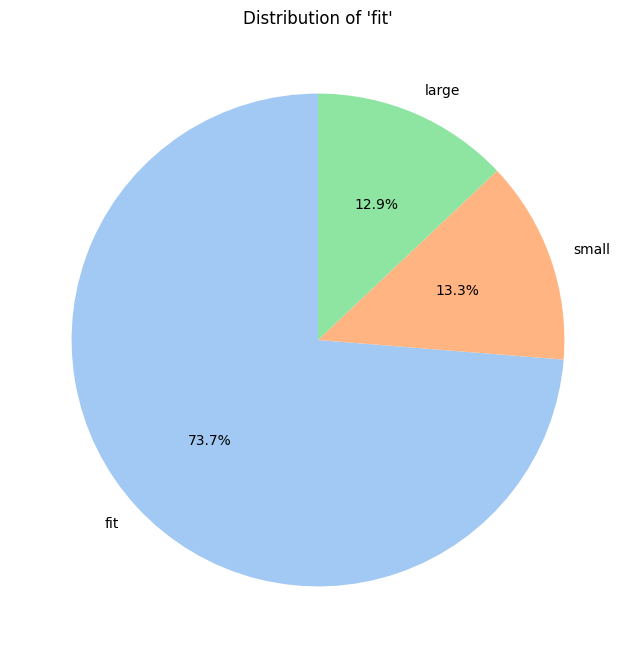

In [29]:
fit_counts = df["fit"].value_counts()
plt.figure(figsize=(8, 8))
fit_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title("Distribution of 'fit'")
plt.ylabel("")
plt.show()

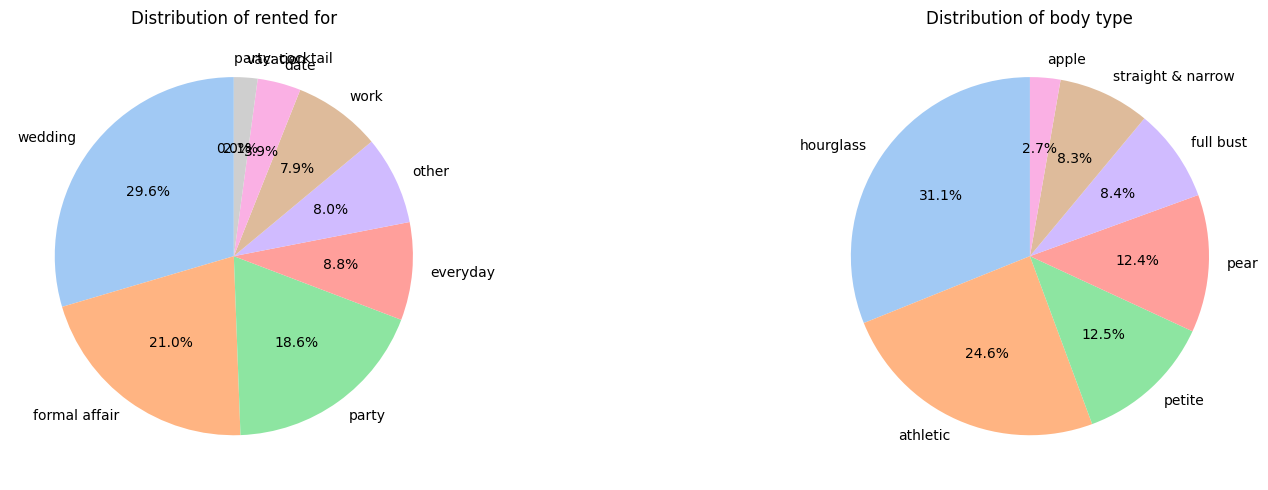

In [30]:
categorical_columns = ["rented for", "body type"]

fig, axes = plt.subplots(1, 2, figsize=(18, 5))
for i, col in enumerate(categorical_columns):
    data = df[col].value_counts()
    axes[i].pie(data, labels=data.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
    axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()


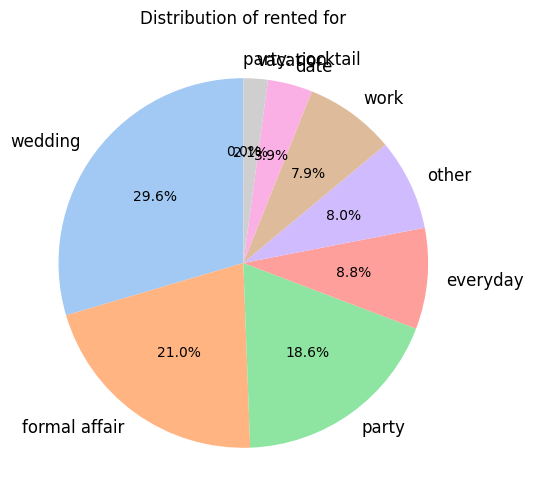

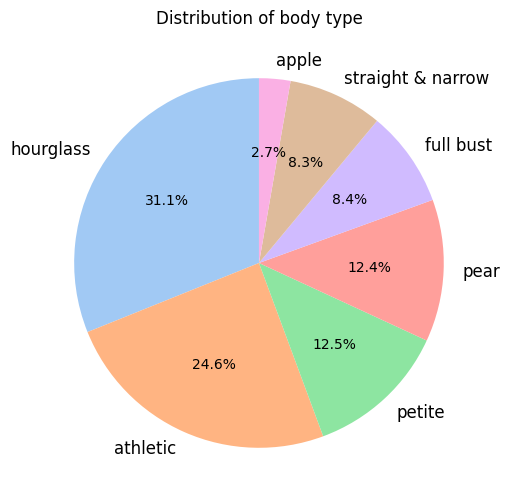

In [31]:
categorical_columns = ["rented for", "body type"]

for col in categorical_columns:
    data = df[col].value_counts()
    plt.figure(figsize=(8, 6))
    wedges, texts, autotexts = plt.pie(
        data, 
        labels=data.index, 
        autopct=lambda pct: f'{pct:.1f}%',  # Ensures percentage is always calculated
        startangle=90, 
        colors=sns.color_palette("pastel"),
        textprops={'fontsize': 12, 'color': 'black'}
    )
    for autotext in autotexts:
        autotext.set_fontsize(10)
        autotext.set_color('black')  # Ensures visibility of text inside slices
    plt.title(f"Distribution of {col}")
    plt.show()


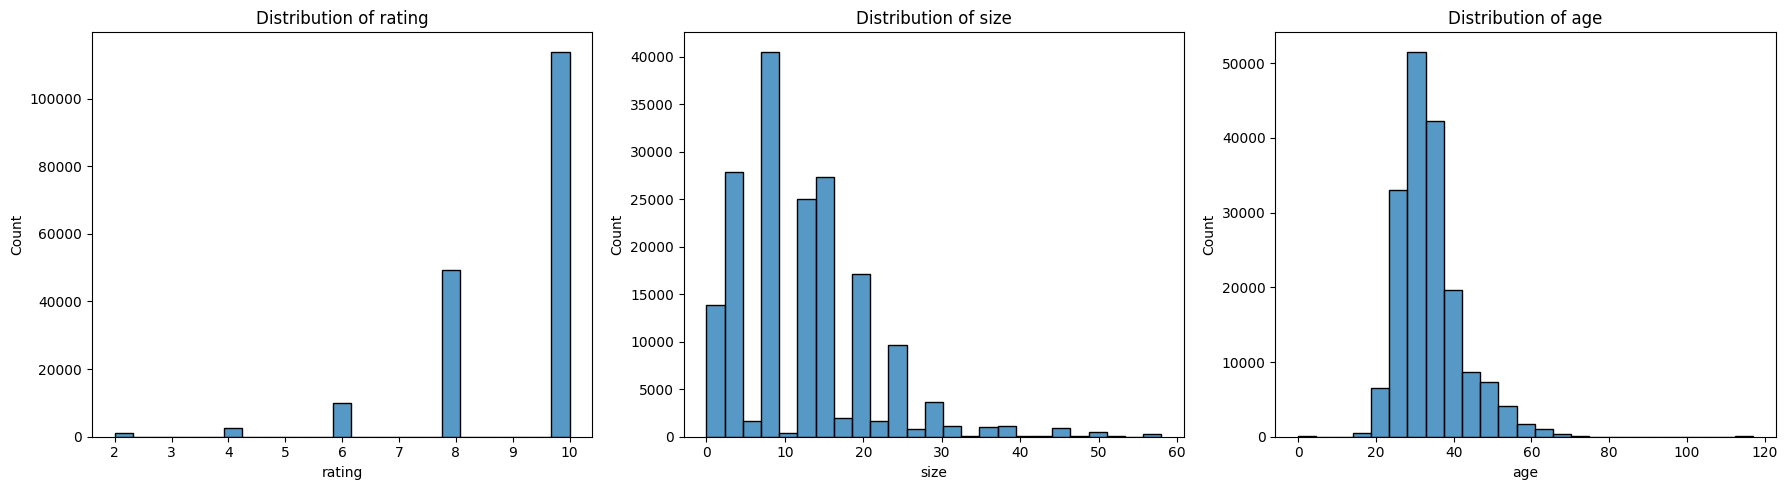

In [49]:
numeric_columns = ["rating", "size", "age"]
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for i, col in enumerate(numeric_columns):
    sns.histplot(df[col], bins=25, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
plt.tight_layout()

In [43]:
df['rating'] = df['rating'].astype(int)
rating_counts = df['rating'].value_counts().sort_index()
rating_counts

rating
2        979
4       2610
6      10003
8      49391
10    113888
Name: count, dtype: int64

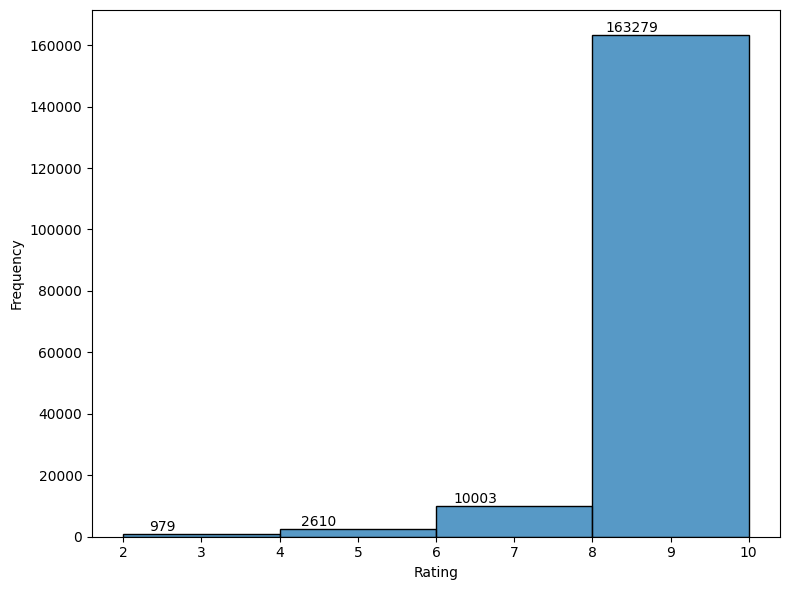

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and axis for the plot
plt.figure(figsize=(8, 6))

# Plot the histogram for the 'rating' column
ax = sns.histplot(df['rating'], bins=4, kde=False)

# Add title and labels
plt.xlabel("Rating")
plt.ylabel("Frequency")

# Get the counts and edges of the bins
counts, bins = np.histogram(df['rating'], bins=4)

# Add count labels above each bar
for i in range(len(counts)):
    ax.text(bins[i] + 0.5, counts[i] + 1, str(counts[i]), ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


In [232]:
import pandas as pd
from collections import defaultdict

# Constructing mappings for users and items
usersPerItem = defaultdict(set)
itemsPerUser = defaultdict(set)

for _, row in df.iterrows():
    user, item = row['user_id'], row['item_id']
    usersPerItem[item].add(user)
    itemsPerUser[user].add(item)

# Recommender logic with progress updates
def jaccard_similarity(item1, item2):
    """Compute Jaccard similarity between two items."""
    users1 = usersPerItem[item1]
    users2 = usersPerItem[item2]
    numer = len(users1.intersection(users2))
    denom = len(users1.union(users2))
    return numer / denom if denom != 0 else 0

def compute_score(user, item):
    """Compute a recommendation score for a given user and item."""
    max_similarity = 0
    for existing_item in itemsPerUser[user]:
        similarity = jaccard_similarity(item, existing_item)
        max_similarity = max(max_similarity, similarity)
    
    # Popularity score as the number of users who interacted with the item
    popularity_score = len(usersPerItem[item])
    
    # Weighted score
    total_score = 5 * max_similarity + popularity_score
    return total_score

# Generate predictions with progress updates
user_item_scores = defaultdict(list)
processed_count = 0
progress_step = 50000  # Print progress every 50,000 iterations

for _, row in df.iterrows():
    user, item = row['user_id'], row['item_id']
    score = compute_score(user, item)
    user_item_scores[user].append((item, score))

    # Progress update
    processed_count += 1
    if processed_count % progress_step == 0:
        print(f"Processed {processed_count} rows.")

# Sorting predictions for each user
predictions = {}
for user, items in user_item_scores.items():
    items.sort(key=lambda x: x[1], reverse=True)
    num_items = len(items)
    num_read = num_items // 2
    
    for i, (item, _) in enumerate(items):
        predictions[(user, item)] = 1 if i < num_read else 0

# Displaying predictions
for (user, item), prediction in predictions.items():
    print(f"User {user} -> Item {item}: {'Recommended' if prediction == 1 else 'Not Recommended'}")


Processed 50000 rows.
Processed 100000 rows.
Processed 150000 rows.
User 420272 -> Item 2340996: Recommended
User 420272 -> Item 1083818: Recommended
User 420272 -> Item 348662: Recommended
User 420272 -> Item 2260466: Not Recommended
User 420272 -> Item 2431951: Not Recommended
User 420272 -> Item 2363191: Not Recommended
User 273551 -> Item 153475: Not Recommended
User 909926 -> Item 126335: Not Recommended
User 151944 -> Item 466944: Recommended
User 151944 -> Item 1746190: Recommended
User 151944 -> Item 616682: Recommended
User 151944 -> Item 1427750: Not Recommended
User 151944 -> Item 524341: Not Recommended
User 151944 -> Item 1187427: Not Recommended
User 151944 -> Item 2376757: Not Recommended
User 734848 -> Item 364092: Not Recommended
User 336066 -> Item 1650899: Recommended
User 336066 -> Item 1808106: Recommended
User 336066 -> Item 499380: Recommended
User 336066 -> Item 1384766: Recommended
User 336066 -> Item 361530: Recommended
User 336066 -> Item 1573992: Recommended

In [246]:
temp = pd.DataFrame(
    list(predictions.items()),
    columns=['Pair', 'Value']
)

# Split the tuple into separate columns
temp[['Key1', 'Key2']] = pd.DataFrame(df['Pair'].tolist(), index=df.index)

# Drop the original 'Pair' column
temp = temp.drop(columns=['Pair'])

# Rearrange columns if needed
temp = temp[['Key1', 'Key2', 'Value']]

temp

{('420272', '2340996'): 1,
 ('420272', '1083818'): 1,
 ('420272', '348662'): 1,
 ('420272', '2260466'): 0,
 ('420272', '2431951'): 0,
 ('420272', '2363191'): 0,
 ('273551', '153475'): 0,
 ('909926', '126335'): 0,
 ('151944', '466944'): 1,
 ('151944', '1746190'): 1,
 ('151944', '616682'): 1,
 ('151944', '1427750'): 0,
 ('151944', '524341'): 0,
 ('151944', '1187427'): 0,
 ('151944', '2376757'): 0,
 ('734848', '364092'): 0,
 ('336066', '1650899'): 1,
 ('336066', '1808106'): 1,
 ('336066', '499380'): 1,
 ('336066', '1384766'): 1,
 ('336066', '361530'): 1,
 ('336066', '1573992'): 1,
 ('336066', '2635020'): 1,
 ('336066', '664127'): 1,
 ('336066', '2363191'): 1,
 ('336066', '2001228'): 1,
 ('336066', '2104233'): 1,
 ('336066', '333479'): 1,
 ('336066', '276056'): 1,
 ('336066', '2599988'): 1,
 ('336066', '843274'): 0,
 ('336066', '2214689'): 0,
 ('336066', '1540425'): 0,
 ('336066', '2650253'): 0,
 ('336066', '1592991'): 0,
 ('336066', '1263144'): 0,
 ('336066', '2162634'): 0,
 ('336066', '2

In [236]:
# Convert user_item_scores to a DataFrame
recommendations = user_item_scores

# Create DataFrame
sorted_scores = pd.DataFrame(predictions)

# Sort by user_id and similarity_score in descending order
sorted_scores = sorted_scores.sort_values(by=['user_id', 'similarity_score'], ascending=[True, False])


def calculate_accuracy(df, k):
    """
    Calculate the accuracy for top-K predictions when all user-item pairs in the dataset are ground truth.
    Args:
        df: DataFrame containing user_id, item_id, and similarity_score.
        k: Number of top recommendations to consider.
    Returns:
        Accuracy as a fraction of correctly predicted recommendations.
    """
    correct_predictions = 0
    total_predictions = 0

    for user, group in df.groupby('user_id'):
        # Top K recommendations for the user
        top_k = group.nlargest(k, 'similarity_score')
        recommended_items = set(top_k['item_id'])
        
        # Ground truth for this user (all items associated with the user in the dataset)
        truth_items = set(group['item_id'])
        
        # Count correct predictions
        correct_predictions += len(recommended_items.intersection(truth_items))
        total_predictions += k

    # Accuracy calculation
    return correct_predictions / total_predictions if total_predictions > 0 else 0

# Example usage with k=10
k = 5
accuracy = calculate_accuracy(sorted_scores, k)
print(f"Accuracy@{k}: {accuracy:.4f}")


ValueError: If using all scalar values, you must pass an index

In [ ]:
# l = 5, p = 0.3251

In [222]:
def calculate_precision_recall(df, k):
    """
    Calculate precision and recall for top-K predictions.
    Args:
        df: DataFrame containing user_id, item_id, and similarity_score.
        k: Number of top recommendations to consider.
    Returns:
        Tuple containing average precision and recall across all users.
    """
    total_precision = 0
    total_recall = 0
    user_count = 0

    for user, group in df.groupby('user_id'):
        # Top K recommendations for the user
        top_k = group.nlargest(k, 'similarity_score')
        recommended_items = set(top_k['item_id'])
        
        # Ground truth for this user (all items associated with the user in the dataset)
        truth_items = set(group['item_id'])
        
        # Count correct predictions
        correct_predictions = len(recommended_items.intersection(truth_items))
        
        # Precision and Recall for this user
        precision = correct_predictions / k if k > 0 else 0
        recall = correct_predictions / len(truth_items) if len(truth_items) > 0 else 0
        
        total_precision += precision
        total_recall += recall
        user_count += 1

    # Average precision and recall across all users
    avg_precision = total_precision / user_count if user_count > 0 else 0
    avg_recall = total_recall / user_count if user_count > 0 else 0

    return avg_precision, avg_recall

# Example usage with k=5
k = 5
precision, recall = calculate_precision_recall(sorted_scores, k)
print(f"Precision@{k}: {precision:.4f}")
print(f"Recall@{k}: {recall:.4f}")


Precision@5: 0.3251
Recall@5: 0.9842


In [208]:
import pandas as pd
import random

# Function to generate random recommendations
def random_recommender(df, k):
    """
    Generate random recommendations for each user.
    
    Args:
        df: DataFrame containing user_id, item_id.
        k: Number of recommendations to generate for each user.
    
    Returns:
        DataFrame with random recommendations.
    """
    recommendations = []

    # For each unique user in the dataset
    for user in df['user_id'].unique():
        # Get all items
        all_items = df['item_id'].unique()
        
        # Randomly sample 'k' items for the user (with replacement allowed)
        random_items = random.sample(list(all_items), k)
        
        # Add recommendations to the list
        for item in random_items:
            recommendations.append((user, item))

    # Create DataFrame from the random recommendations
    recommendations_df = pd.DataFrame(recommendations, columns=['user_id', 'item_id'])
    return recommendations_df

# Generate random recommendations for each user
k = 3  # Number of random recommendations per user
random_recs = random_recommender(df, k)

# Show the random recommendations
print(random_recs)


       user_id  item_id
0       420272  2665954
1       420272  2380117
2       420272   680249
3       273551  2156034
4       273551   443517
...        ...      ...
286189  961120  1070445
286190  961120  2830897
286191  123612  1740815
286192  123612   181453
286193  123612   128959

[286194 rows x 2 columns]


In [209]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming df contains the actual interactions (user_id, item_id)
# and random_recs contains the recommended items

# Merge the actual interactions with the recommendations
merged = pd.merge(df, random_recs, on=['user_id', 'item_id'], how='right', indicator=True)

# Calculate true positives, false positives, and false negatives
merged['actual_interaction'] = merged['_merge'] == 'both'

# Precision, recall, F1 score calculation
# True positives are when 'actual_interaction' is True, and the recommendation exists
precision = precision_score(merged['actual_interaction'], merged['item_id'].notna(), average='binary')
recall = recall_score(merged['actual_interaction'], merged['item_id'].notna(), average='binary')
f1 = f1_score(merged['actual_interaction'], merged['item_id'].notna(), average='binary')

# Print out the metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.0003
Recall: 1.0000
F1 Score: 0.0006


In [ ]:
import pandas as pd

# Function to generate popularity-based recommendations
def popularity_recommender(df, k):
    """
    Generate popularity-based recommendations for each user.
    
    Args:
        df: DataFrame containing user_id, item_id.
        k: Number of recommendations to generate for each user.
    
    Returns:
        DataFrame with popularity-based recommendations.
    """
    recommendations = []

    # Calculate the popularity of each item based on interactions
    item_popularity = df['item_id'].value_counts().reset_index()
    item_popularity.columns = ['item_id', 'popularity']
    
    # For each unique user in the dataset
    for user in df['user_id'].unique():
        # Get the items the user has already interacted with
        user_items = df[df['user_id'] == user]['item_id'].unique()
        
        # Get the top 'k' popular items that the user has not interacted with
        popular_items = item_popularity[~item_popularity['item_id'].isin(user_items)].head(k)
        
        # Add recommendations to the list
        for _, row in popular_items.iterrows():
            recommendations.append((user, row['item_id']))

    # Create DataFrame from the popularity-based recommendations
    recommendations_df = pd.DataFrame(recommendations, columns=['user_id', 'item_id'])
    return recommendations_df

# Generate popularity-based recommendations for each user
k = 3  # Number of recommendations per user
popularity_recs = popularity_recommender(df, k)

# Show the popularity-based recommendations
print(popularity_recs)


In [218]:
import pandas as pd

# Function to calculate precision and recall
def calculate_precision_recall(df, recommendations_df, k):
    """
    Calculate precision and recall for popularity-based recommendations.
    
    Args:
        df: Original DataFrame containing user_id and item_id (ground truth).
        recommendations_df: DataFrame with recommendations.
        k: Number of recommendations per user.
    
    Returns:
        Precision and Recall values.
    """
    total_relevant = 0  # Count of relevant (recommended and interacted) items
    total_recommended = 0  # Count of all recommended items
    total_interacted = 0  # Count of all items users have interacted with
    
    for user in df['user_id'].unique():
        # Ground truth: items the user has interacted with
        ground_truth_items = set(df[df['user_id'] == user]['item_id'])
        total_interacted += len(ground_truth_items)
        
        # Recommended items for this user
        recommended_items = set(recommendations_df[recommendations_df['user_id'] == user]['item_id'])
        total_recommended += len(recommended_items)
        
        # Relevant recommendations
        relevant_items = recommended_items.intersection(ground_truth_items)
        total_relevant += len(relevant_items)
    
    # Precision and Recall calculations
    precision = total_relevant / total_recommended if total_recommended > 0 else 0
    recall = total_relevant / total_interacted if total_interacted > 0 else 0
    
    return precision, recall


# Generate popularity-based recommendations
k = 3  # Number of recommendations per user
popularity_recs = popularity_recommender(df, k)

# Calculate precision and recall
precision, recall = calculate_precision_recall(df, popularity_recs, k)

# Display results
print(f"Precision@{k}: {precision:.4f}")
print(f"Recall@{k}: {recall:.4f}")


Precision@3: 0.0000
Recall@3: 0.0000


In [220]:
from sklearn.metrics import precision_score, recall_score, f1_score

# True positives: 'actual_interaction' is True, and the recommendation exists
precision = precision_score(merged['actual_interaction'], merged['item_id'].notna(), average='binary')
recall = recall_score(merged['actual_interaction'], merged['item_id'].notna(), average='binary')
f1 = f1_score(merged['actual_interaction'], merged['item_id'].notna(), average='binary')

# Print out the metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.0003
Recall: 1.0000
F1 Score: 0.0006


In [223]:
df.describe()

weight    height (in)           size            age
count  176871.000000  176871.000000  176871.000000  176871.000000
mean      137.494212      65.304176      12.218227      33.963589
std        20.632905       2.668024       8.480389       8.057023
min        50.000000      54.000000       0.000000       0.000000
25%       125.000000      63.000000       8.000000      29.000000
50%       135.000000      65.000000      12.000000      32.000000
75%       145.241512      67.000000      16.000000      37.000000
max       300.000000      78.000000      58.000000     117.000000